Libraries imported to finish the assessment.

In [16]:
from pandas import read_csv
from matplotlib.pyplot import plot, title, xlabel, ylabel, legend, show
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from warnings import filterwarnings

# Section 1

Data import and summary.

In [2]:
dataset = read_csv('Assessment2_dataset.csv')
dataset.describe(percentiles=[.5]) # generate some descriptive statistics

,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,4.999574,6.379273,9.228112,7.355272,14.199127,3.077958,5.749234,4.997002,8.164563,10.001593,15.187982,9.933591
std,2.764856,2.312569,2.532173,4.354778,11.680045,2.126091,2.526136,4.165490,6.173261,7.336233,12.159625,7.282383
min,0.008200,0.040300,2.583966,0.062300,0.024800,0.008262,0.001224,0.005800,0.000000,0.018500,0.064600,0.009200
50%,4.881100,6.470500,9.348000,7.071550,11.716802,2.672400,5.741357,3.859200,6.752900,8.793050,12.185650,8.853050
max,12.129800,11.928400,15.759900,17.235858,67.979400,10.242738,12.647500,16.555620,36.186438,34.867600,53.238400,43.231400


Data pre-processing.

In [3]:
print('Size of data:', dataset.shape)
print('Count of data with status \"Normal\":', dataset[dataset['Status'] == 'Normal'].index.size)
print('Count of data with status \"Abnormal\":', dataset[dataset['Status'] == 'Abnormal'].index.size)
print('Count of missing values:', dataset.isna().any().sum())

# replace the data of the column "Status" with 1 ("Normal") or 0 ("Abnormal")
dataset.loc[dataset['Status'] == 'Normal', 'Status'] = 1
dataset.loc[dataset['Status'] == 'Abnormal', 'Status'] = 0

dataset = shuffle(dataset) # shuffle the data

x = dataset.drop(['Status'], axis = 1) # use the data of all columns except the column "Status" as the input values
y = dataset['Status'] # use the data of the column "Status" as the output values

x_normalised = StandardScaler().fit_transform(x) # normalise the data which will be used to apply an ANN in Section 4

Size of data: (996, 13)
Count of data with status "Normal": 498
Count of data with status "Abnormal": 498
Count of missing values: 0


Data visualisation.

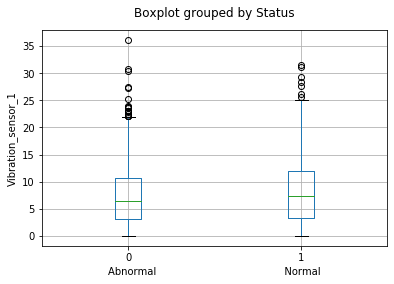

In [4]:
# a box plot which will include "Status" in the x-axis and "Vibration_sensor_1" in the y-axis
dataset.boxplot(column = ['Vibration_sensor_1'], by = 'Status')
title(None)
xlabel('Abnormal                                         Normal')
ylabel('Vibration_sensor_1')
show()

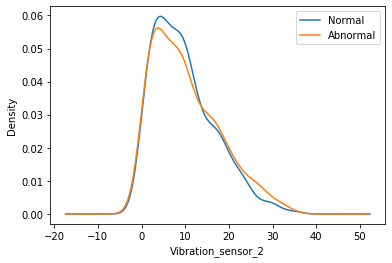

In [5]:
# a density plot for "Vibration_sensor_2" of each status
dataset[dataset['Status'] == 1]['Vibration_sensor_2'].plot(kind = 'kde', label = 'Normal')
dataset[dataset['Status'] == 0]['Vibration_sensor_2'].plot(kind = 'kde', label = 'Abnormal')
xlabel('Vibration_sensor_2')
legend()
show()

# Section 3

Data pre-processing based on Section 1.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1) # split the data into training (90% of the data) and test sets

# normalise the split data which will be used to apply an ANN
scaler = StandardScaler().fit(x_train)
x_train_normalised = scaler.transform(x_train)
x_test_normalised = scaler.transform(x_test)

Implementation of applying an ANN.

In [8]:
def ApplyAnn(x_train, x_test, y_train, y_test, epoch = 200) -> float:
    '''
    Design, train, and evaluate a specified ANN with 500 neurons in the hidden layer.

    :param x_train: training input values
    :param x_test: test input values
    :param y_train: training output values
    :param y_test: test output values
    :param epoch: an integer representing the max iteration steps (default = 200)
    :returns: the accuracy of the ANN
    '''

    ann = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (500, 500), max_iter = epoch, random_state = 1)
    ann.fit(x_train, y_train)
    return ann.score(x_test, y_test)

Design, train, and evaluate the ANN with 500 neurons in each hidden layer and 200 epochs.

In [9]:
print('Accuracy:', ApplyAnn(x_train_normalised, x_test_normalised, y_train, y_test))

Accuracy: 0.67


## Bonus

Use various epochs to monitor how accuracy changes as the ANN keeps learning.

List of epochs: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
List of accuracy: [0.62, 0.69, 0.66, 0.66, 0.71, 0.7, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67]


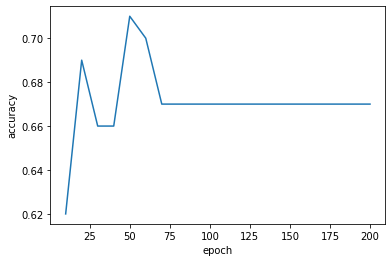

In [10]:
filterwarnings('ignore') # the function is mainly used to ignore convergence warnings
epochList = [10 * i for i in range(1, 21)]
accuracyList = []

# loop to use various epochs to design, train, and evaluate an ANN
for epoch in epochList:
    accuracyList.append(ApplyAnn(x_train_normalised, x_test_normalised, y_train, y_test, epoch))

print('List of epochs:', epochList)
print('List of accuracy:', accuracyList)
    
plot(epochList, accuracyList)
xlabel('epoch')
ylabel('accuracy')
show()

Implementation of applying a random forest classifier.

In [24]:
def ApplyRandomForest(x_train, x_test, y_train, y_test, treeNum = 10, minSampleNum = 1) -> float:
    '''
    Design, train, and evaluate a specified random forest classifier.

    :param x_train: training input values
    :param x_test: test input values
    :param y_train: training output values
    :param y_test: test output values
    :param treeNum: the number of trees (default = 10)
    :param minSampleNum: the minimum number of samples required to be at a leaf node (default = 1)
    :returns: the accuracy of a random forest classifier
    '''

    randomForest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = minSampleNum, n_estimators = treeNum, random_state = 1)
    randomForest.fit(x_train, y_train)
    return randomForest.score(x_test, y_test)

Design, train, and evaluate the random forest classifier with 1000 trees and at least 5 samples at a leaf node.

In [25]:
print('Accuracy:', ApplyRandomForest(x_train, x_test, y_train, y_test, 1000, 5))

Accuracy: 0.89


Design, train, and evaluate the random forest classifier with 1000 trees and at least 50 samples at a leaf node.

In [26]:
print('Accuracy:', ApplyRandomForest(x_train, x_test, y_train, y_test, 1000, 50))

Accuracy: 0.83


## Bonus

Use various numbers of trees to monitor how the accuracy of a random forest classifier changes.

List of numbers of trees: [10, 50, 100, 500, 1000, 5000, 10000]
List of accuracy (at least 5 samples at a leaf node): [0.89, 0.93, 0.92, 0.9, 0.89, 0.91, 0.91]
List of accuracy (at least 50 samples at a leaf node): [0.78, 0.81, 0.83, 0.85, 0.83, 0.83, 0.83]


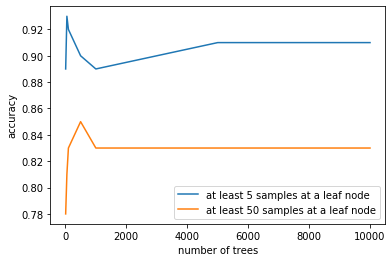

In [27]:
treeNumList = [10, 50, 100, 500, 1000, 5000, 10000]
accuracyList_5 = []
accuracyList_50 = []

# loop to use various number of trees to design, train, and evaluate a random forest classifier
for treeNum in treeNumList:
    accuracyList_5.append(ApplyRandomForest(x_train, x_test, y_train, y_test, treeNum, 5))
    accuracyList_50.append(ApplyRandomForest(x_train, x_test, y_train, y_test, treeNum, 50))
    
print('List of numbers of trees:', treeNumList)
print('List of accuracy (at least 5 samples at a leaf node):', accuracyList_5)
print('List of accuracy (at least 50 samples at a leaf node):', accuracyList_50)

plot(treeNumList, accuracyList_5, label = 'at least 5 samples at a leaf node')
plot(treeNumList, accuracyList_50, label = 'at least 50 samples at a leaf node')
xlabel('number of trees')
ylabel('accuracy')
legend()
show()

# Section 4

Model selection.

In [29]:
tenFoldCv = KFold(n_splits = 10, random_state = 1) # apply a 10-fold CV process

# loop to show the mean accuracy results for each set of parameters of an ANN
for neuronNum in [50, 500, 1000]:
    cvScore_Ann = cross_val_score(MLPClassifier(activation = 'logistic', hidden_layer_sizes = (neuronNum, neuronNum), random_state = 1), x_normalised, y, cv = tenFoldCv)
    print('Mean accuracy of the ANN with {0} neurons in each hidden layer: {1}'.format(neuronNum, cvScore_Ann.mean()))

print()

# loop to show the mean accuracy results for each set of parameters of a random forest classifier
for treeNum in [20, 500, 10000]:
    cvScore_RandomForest = cross_val_score(RandomForestClassifier(criterion = 'entropy', n_estimators = treeNum, random_state = 1), x, y, cv = tenFoldCv)
    print('Mean accuracy of the random forest classifier with {0} trees: {1}'.format(treeNum, cvScore_RandomForest.mean()))

Mean accuracy of the ANN with 50 neurons in each hidden layer: 0.7389898989898989
Mean accuracy of the ANN with 500 neurons in each hidden layer: 0.7128888888888889
Mean accuracy of the ANN with 1000 neurons in each hidden layer: 0.7078383838383837

Mean accuracy of the random forest classifier with 20 trees: 0.9156969696969697
Mean accuracy of the random forest classifier with 500 trees: 0.9297676767676768
Mean accuracy of the random forest classifier with 10000 trees: 0.9287777777777778
